In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\varun\Downloads\Bangalore  house data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [18]:
# Create a reference dictionary with (total_sq_feet, balcony) as the key and society as the value
reference_dict = df.dropna(subset=['society']).set_index(['total_sqft', 'balcony'])['society'].to_dict()

# Function to fill missing society values
def fill_missing_society(row):
    if pd.isna(row['society']):
        return reference_dict.get((row['total_sqft'], row['balcony']), row['society'])
    return row['society']

# Apply the function to the dataset
df['society'] = df.apply(fill_missing_society, axis=1)

# Check how many missing societies are left
print(f"Remaining Missing Societies: {df['society'].isna().sum()}")

# Save the updated dataset
df.to_csv('filled_society_data.csv', index=False)

Remaining Missing Societies: 268


In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         1253
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [13]:
# Create a reference dictionary with (total_sq_feet, balcony) as the key and society as the value
reference_dict = df.dropna(subset=['society']).set_index(['size', 'location'])['society'].to_dict()

# Function to fill missing society values
def fill_missing_society(row):
    if pd.isna(row['society']):
        return reference_dict.get((row['size'], row['location']), row['society'])
    return row['society']

# Apply the function to the dataset
df['society'] = df.apply(fill_missing_society, axis=1)

# Check how many missing societies are left
print(f"Remaining Missing Societies: {df['society'].isna().sum()}")

# Save the updated dataset
df.to_csv('filled_society_data.csv', index=False)

Remaining Missing Societies: 522


In [16]:
# Fill NaN values in the 'balcony' column with 0
df['balcony'] = df['balcony'].fillna(0)


In [33]:
df.isnull().sum()

area_type       0
availability    0
location        1
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
# Create a reference dictionary with (total_sq_feet, balcony) as the key and society as the value
reference_dict = df.dropna(subset=['society']).set_index(['price'])['society'].to_dict()

# Function to fill missing society values
def fill_missing_society(row):
    if pd.isna(row['society']):
        return reference_dict.get((row['price']), row['society'])
    return row['society']

# Apply the function to the dataset
df['society'] = df.apply(fill_missing_society, axis=1)

# Check how many missing societies are left
print(f"Remaining Missing Societies: {df['society'].isna().sum()}")

# Save the updated dataset
df.to_csv('filled_society_data.csv', index=False)

Remaining Missing Societies: 33


In [22]:
# Create a reference dictionary with (total_sq_feet, balcony) as the key and society as the value
reference_dict = df.dropna(subset=['society']).set_index(['bath'])['society'].to_dict()

# Function to fill missing society values
def fill_missing_society(row):
    if pd.isna(row['society']):
        return reference_dict.get((row['bath']), row['society'])
    return row['society']

# Apply the function to the dataset
df['society'] = df.apply(fill_missing_society, axis=1)

# Check how many missing societies are left
print(f"Remaining Missing Societies: {df['society'].isna().sum()}")

# Save the updated dataset
df.to_csv('filled_society_data.csv', index=False)

Remaining Missing Societies: 0


In [32]:
df['size'] = df['size'].fillna(0)

In [41]:
df['location']=df['location'].dropna()

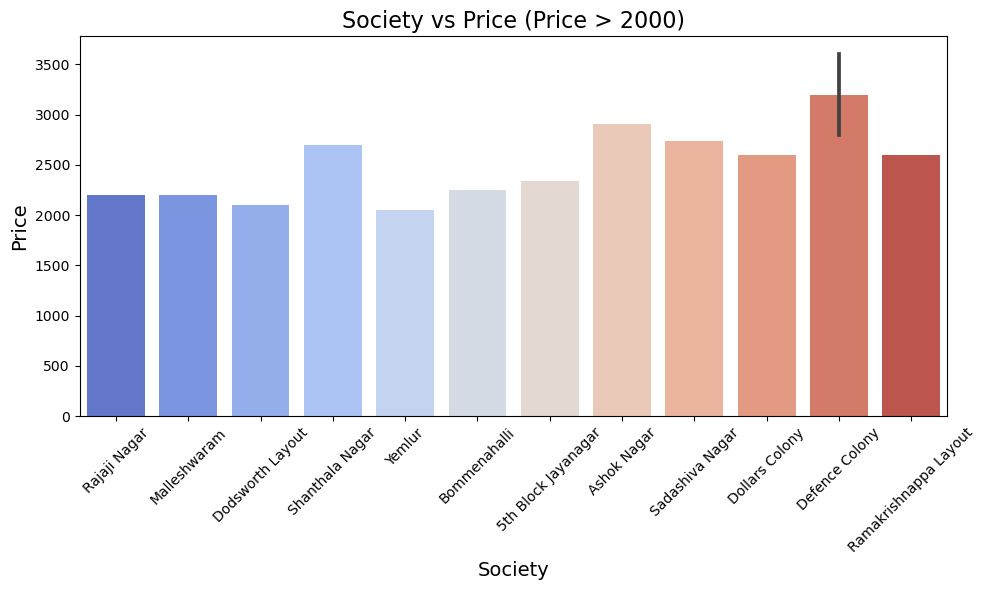

In [55]:
filtered_df = df[df['price'] > 2000]

# Plotting the Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='society', y='price', data=filtered_df, palette='coolwarm')

# Customizing the plot
plt.title('Society vs Price (Price > 2000)', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

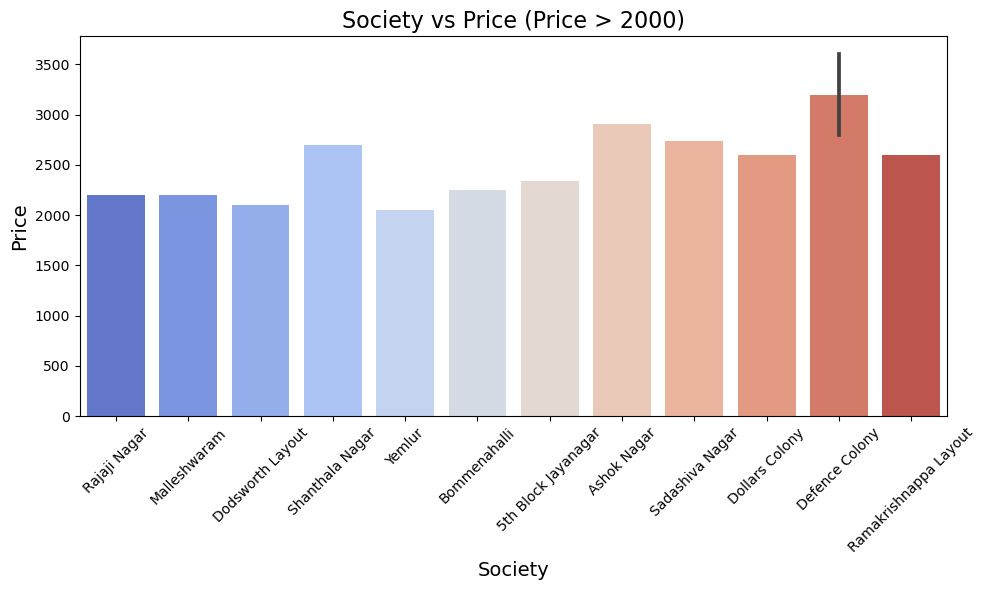

In [58]:
filtered_df = df[df['price'] > 2000]

# Plotting the Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='price', data=filtered_df, palette='coolwarm')

# Customizing the plot
plt.title('Society vs Price (Price > 2000)', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

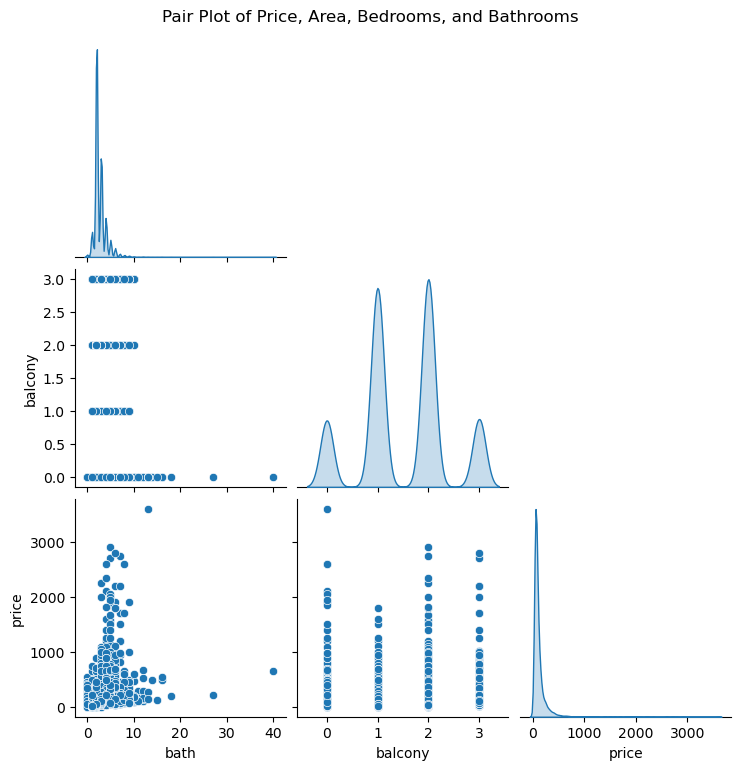

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Select numerical columns related to price analysis
numerical_features = ['bath', 'balcony', 'price']

# Pair Plot
sns.pairplot(df[numerical_features], diag_kind='kde', corner=True)

plt.suptitle('Pair Plot of Price, Area, Bedrooms, and Bathrooms', y=1.02)
plt.show()


In [64]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Electronic City Phase II,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Chikka Tirupathi,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Uttarahalli,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Lingadheeranahalli,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Kothanur,1200,2.0,1.0,51.00


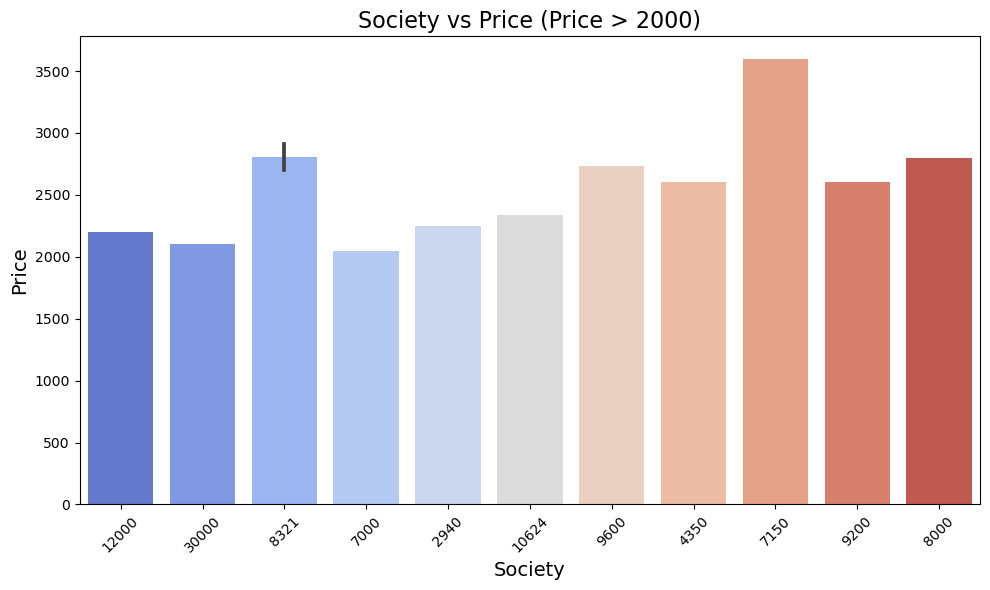

In [65]:
filtered_df = df[df['price'] > 2000]

# Plotting the Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sqft', y='price', data=filtered_df, palette='coolwarm')

# Customizing the plot
plt.title('Society vs Price (Price > 2000)', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

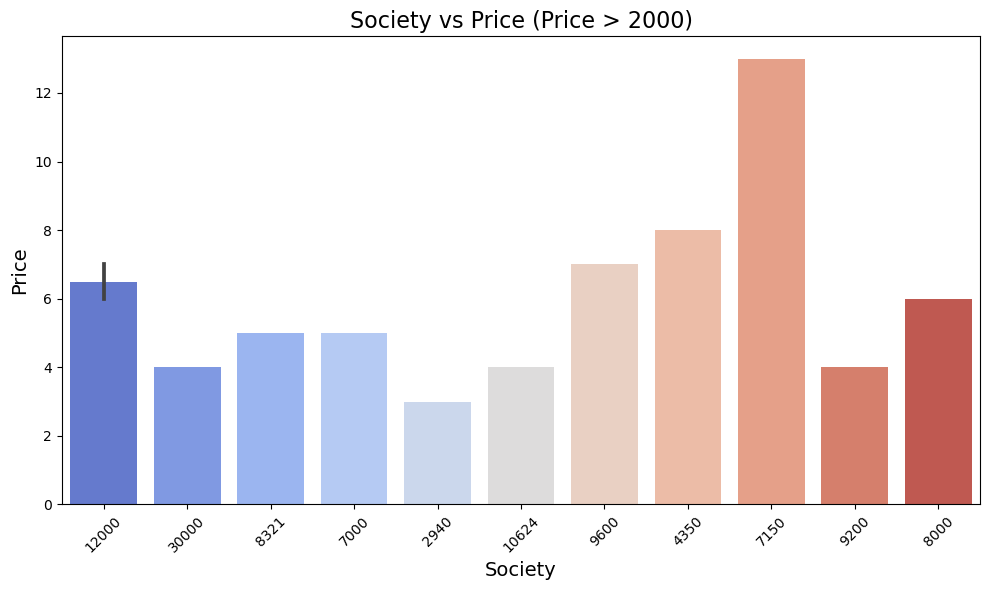

In [67]:


# Plotting the Bar Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sqft', y='bath', data=filtered_df, palette='coolwarm')

# Customizing the plot
plt.title('Society vs Price (Price > 2000)', fontsize=16)
plt.xlabel('Society', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [73]:
df['size'] = df['size'].str.replace('BHK','' '').str.strip()

# Display the updated column
print(df['size'].head())

0            2
1    4 Bedroom
2            3
3            3
4            2
Name: size, dtype: object


In [74]:
df['size']

0                2
1        4 Bedroom
2                3
3                3
4                2
           ...    
13315    5 Bedroom
13316            4
13317            2
13318            4
13319            1
Name: size, Length: 13320, dtype: object